#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [3]:
## import cv2
## import numpy
## import matplotlib pyplot
## import KMeans cluster from sklearn
## import distance from scipy.spatial
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox



In [4]:
## Reading the image plaksha_Faculty.jpg
img = cv2.imread("plaksha_Faculty.jpg")
if img is None:
    raise FileNotFoundError("Could not read 'plaksha_Faculty.jpg'. Make sure it is in the same folder as this notebook.")

## Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Loading the required haar-cascade xml classifier file
cascade_file = "haarcascade_frontalface_default.xml"


if not os.path.exists(cascade_file):
    raise FileNotFoundError(
        f"Missing {cascade_file}."
    )

face_cascade = cv2.CascadeClassifier(cascade_file)

# Applying the face detection method on the grayscale image.
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
# Define the text and font parameters
text = "Face" ## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX  ## Font type
font_scale = 0.5  ## Font scale factor
font_color = (0, 0, 255)  ## Text color in BGR format (here, it's red)
font_thickness = 1  ## Thickness of the text

# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0,255,0), 2)
print(f"Detected faces: {len(faces_rect)}")
## Display the image and window title should be "Total number of face detected are #"
cv2.imshow(f"Total number of face detected are {len(faces_rect)}", img)



Detected faces: 30


c:\Users\Kabir\miniconda3\envs\datasci\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


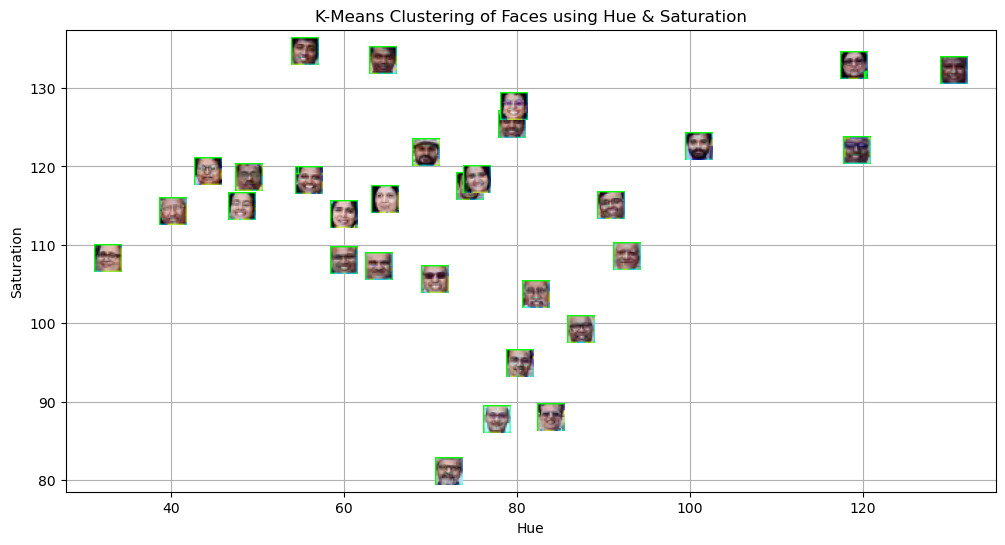

In [5]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10).fit(hue_saturation)
#centroids = kmeans.cluster_centers_
#labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color='red' if kmeans.labels_[i] == 0 else 'blue')

# Put labels and title
plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.title('K-Means Clustering of Faces using Hue & Saturation')
plt.grid(True)
plt.show()


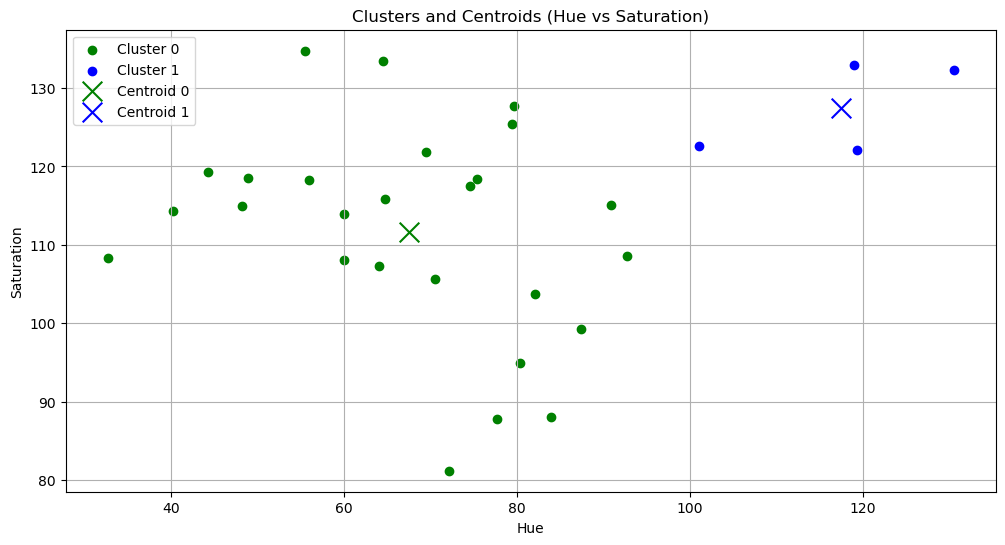

In [6]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label='Cluster 0')


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label='Cluster 1')

# Calculate and plot centroids
centroid_0 = cluster_0_points.mean(axis=0) if len(cluster_0_points) else np.array([np.nan, np.nan])
centroid_1 = cluster_1_points.mean(axis=0) if len(cluster_1_points) else np.array([np.nan, np.nan])

# Plot both the centroids
plt.scatter(centroid_0[0], centroid_0[1], marker='x', c='green', s=200, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], marker='x', c='blue', s=200, label='Centroid 1')

plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.title('Clusters and Centroids (Hue vs Saturation)')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread("Dr_Shashi_Tharoor.jpg")
if template_img is None:
    raise FileNotFoundError("Could not read 'Dr_Shashi_Tharoor.jpg'. Make sure it is in the same folder as this notebook.")

# Detect face  in the template image after converting it to gray and store it in template_faces
template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
template_faces = face_cascade.detectMultiScale(template_gray, 1.05, 4, minSize=(25,25), maxSize=(200,200))

# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
cv2.imshow("Template face detected", template_img)



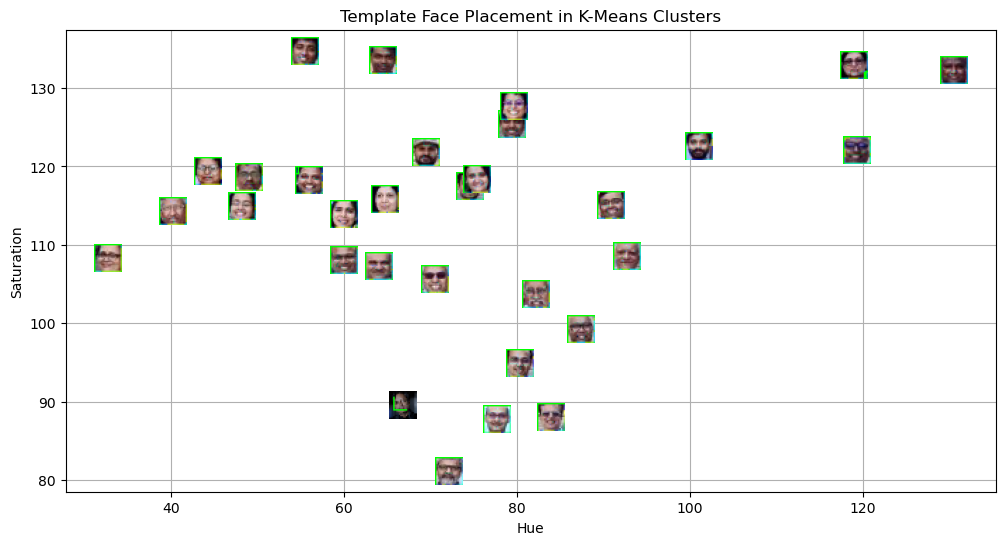

In [8]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = float(np.mean(template_hsv[:, :, 0]))
template_saturation = float(np.mean(template_hsv[:, :, 1]))

# Predict the cluster label for the template image and store it in template_label
template_label = int(kmeans.predict(np.array([[template_hue, template_saturation]]))[0])

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
plt.xlabel('Hue')
## Put y label
plt.ylabel('Saturation')
## Put title
plt.title('Template Face Placement in K-Means Clusters')
## Add grid
plt.grid(True)
## show plot
plt.show()


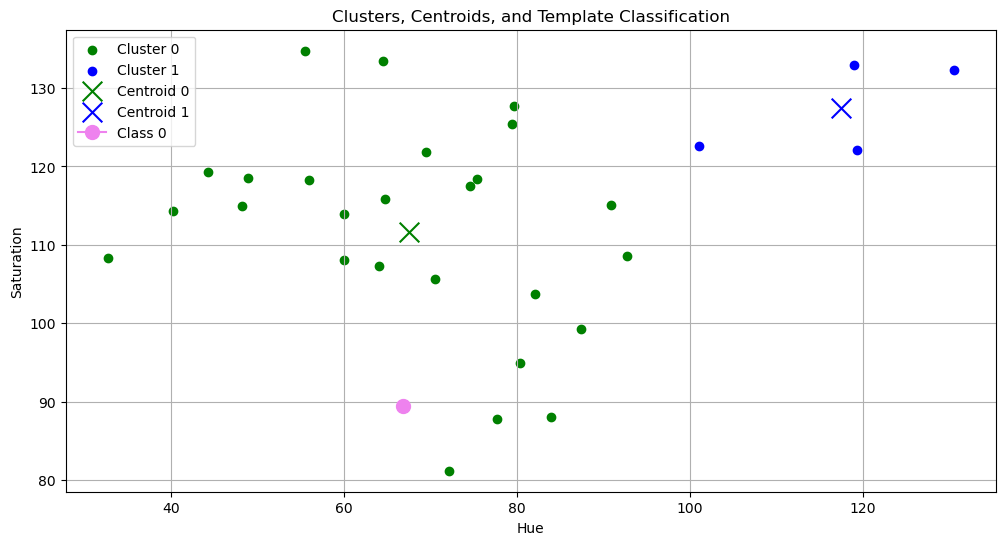

In [9]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = cluster_0_points.mean(axis=0) if len(cluster_0_points) else np.array([np.nan, np.nan])
centroid_1 = cluster_1_points.mean(axis=0) if len(cluster_1_points) else np.array([np.nan, np.nan])

plt.scatter(centroid_0[0], centroid_0[1], marker='x', c='green', s=200, label='Centroid 0') ## plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1], marker='x', c='blue', s=200, label='Centroid 1')  ## plot for centroid 1
plt.plot(template_hue, template_saturation, marker='o', c='violet',markersize= 10, label=f'Class {template_label}' )

## Put x label
plt.xlabel('Hue')
## Put y label
plt.ylabel('Saturation')
## Put title
plt.title('Clusters, Centroids, and Template Classification')
## Add a legend
plt.legend()
## Add grid
plt.grid(True)
## show the plot
plt.show()
                                            ## End of the lab 5 ##


## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 
Euclidean (L2)

Manhattan (L1)

Minkowski

Cosine distance

Chebyshev (L∞)

Mahalanobis

Hamming (binary/categorical) 


#### 2. What are some real-world applications of distance-based classification algorithms? 
Face/image matching

Document/text similarity

Recommendations (“similar users/items”)

Medical case matching

Fraud/anomaly detection

Customer grouping/segmentation

#### 3. Explain various distance metrics. 
Euclidean: straight-line difference

Manhattan: sum of absolute differences

Minkowski: general Lp version of L1/L2

Cosine: compares direction (good for text)

Chebyshev: biggest single-feature difference

Mahalanobis: accounts for scale + feature correlation

Hamming: count of mismatched bits/labels

#### 4. What is the role of cross validation in model performance? 

Tests model on many splits → more reliable performance estimate

Helps pick hyperparameters (e.g., K) and reduces overfitting to one split

#### 5. Explain variance and bias in terms of KNN? 

Small K: low bias, high variance (overfits/noisy)

Large K: high bias, low variance (too smooth/underfits)